# Employee Attrition

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('Attrition.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [89]:
# not a lot of null values available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [90]:
df.duplicated().sum()

0

# Cleaning the data and Filling Null Values

### EnvironmentSatisfaction

In [91]:
df['EnvironmentSatisfaction'].isnull().sum()

25

In [92]:
df['EnvironmentSatisfaction'].value_counts()

3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

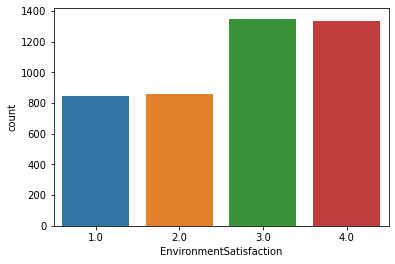

In [93]:
sns.countplot(df['EnvironmentSatisfaction'])

In [94]:
# filling the null values with most occuring values
df['EnvironmentSatisfaction'].fillna(3.0,inplace=True)

In [95]:
# changing data type from float to int
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('int')

### JobSatisfaction

In [96]:
df['JobSatisfaction'].isnull().sum()

20

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

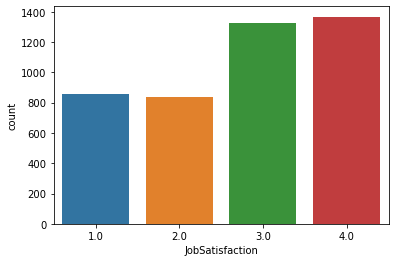

In [97]:
sns.countplot(df['JobSatisfaction'])

In [98]:
# filling the null values with most occuring values
df['JobSatisfaction'].fillna(4.0,inplace=True)

In [99]:
# changing data type from float to int
df['JobSatisfaction'] = df['JobSatisfaction'].astype('int')

### WorkLifeBalance

In [100]:
df['WorkLifeBalance'].isnull().sum()

38

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

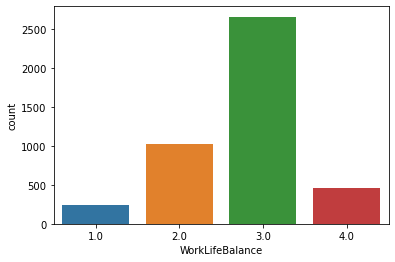

In [101]:
sns.countplot(df['WorkLifeBalance'])

In [102]:
df['WorkLifeBalance'].fillna(3.0,inplace=True)

In [103]:
# changing data type from float to int
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('int')

### TotalWorkingYears

In [104]:
df['TotalWorkingYears'].isnull().sum()

9

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

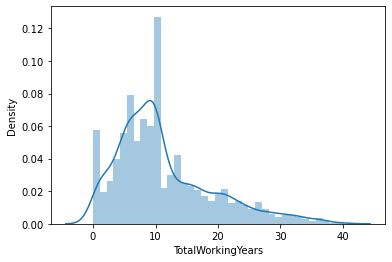

In [105]:
sns.distplot(df['TotalWorkingYears'])

In [106]:
# filling null values with mean
df['TotalWorkingYears'].fillna(round(df['TotalWorkingYears'].mean()),inplace=True)

In [107]:
# changing type from float to int
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype('int')

### NumCompaniesWorked

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

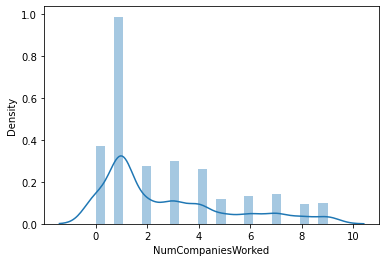

In [108]:
sns.distplot(df['NumCompaniesWorked'])

In [109]:
df['NumCompaniesWorked'].isnull().sum()

19

In [110]:
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(),inplace=True)

In [111]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('int')

# Removing Columns

In [112]:
# Same Single value occuring throughout the rows
df[['Over18','EmployeeCount','StandardHours']]

,Over18,EmployeeCount,StandardHours
0,Y,1,8
1,Y,1,8
2,Y,1,8
3,Y,1,8
4,Y,1,8
...,...,...,...
4405,Y,1,8
4406,Y,1,8
4407,Y,1,8
4408,Y,1,8


In [113]:
# dropping those columns
df.drop(columns=['Over18','EmployeeCount','StandardHours'],inplace=True)

## Discretization

### MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

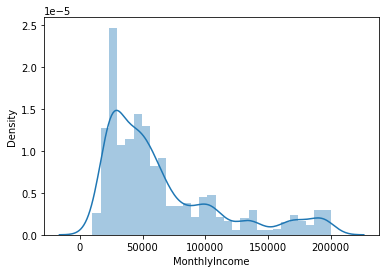

In [114]:
sns.distplot(df['MonthlyIncome'])

In [115]:
def salary_slabs(row):
    if row <= 50000:
        return '0-50K'
    elif row > 50000 and row <=100000:
        return '50K-100K'
    elif row > 100000 and row <=150000:
        return '100K-150K'
    else:
        return '150K+'

In [116]:
df['MonthlyIncome'] = df['MonthlyIncome'].apply(salary_slabs)

In [117]:
df['MonthlyIncome'].value_counts()

0-50K        2247
50K-100K     1320
100K-150K     444
150K+         399
Name: MonthlyIncome, dtype: int64

In [118]:
# cleaned data and null values handled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               4410 non-null   int64 
 1   Age                      4410 non-null   int64 
 2   Attrition                4410 non-null   object
 3   BusinessTravel           4410 non-null   object
 4   Department               4410 non-null   object
 5   DistanceFromHome         4410 non-null   int64 
 6   Education                4410 non-null   int64 
 7   EducationField           4410 non-null   object
 8   Gender                   4410 non-null   object
 9   JobLevel                 4410 non-null   int64 
 10  JobRole                  4410 non-null   object
 11  MaritalStatus            4410 non-null   object
 12  MonthlyIncome            4410 non-null   object
 13  NumCompaniesWorked       4410 non-null   int32 
 14  PercentSalaryHike        4410 non-null  

# Exporting the dataset

In [119]:
df.to_csv('Attrition_cleaned.csv',index=False)